In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import string
import warnings
import glob

# pulling behavior analysis
## load behavioral results

In [28]:
## claim the list of sessions

animal1_name = "Koala"
animal2_name = "Vermelho"

session_dates = ["20230602","20230605","20230606","20230607","20230608","20230609"]


nsessions = np.shape(session_dates)[0]


In [47]:
# load session behavioral results

cumulative_pulls_animal1 = {}
cumulative_pulls_animal2 = {}

for ii in np.arange(0,nsessions,1):

    date_tgt = session_dates[ii]
    
    bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_joystick_task/"+date_tgt+"_"+animal1_name+"_"+animal2_name+"/"
    try:
        trial_record_json = glob.glob(bhv_data_path+date_tgt+"_"+animal1_name+"_"+animal2_name+"_TrialRecord" + "*.json")
        bhv_data_json = glob.glob(bhv_data_path+date_tgt+"_"+animal1_name+"_"+animal2_name+"_bhv_data" + "*.json")
        session_info_json = glob.glob(bhv_data_path+date_tgt+"_"+animal1_name+"_"+animal2_name+"_session_info" + "*.json")
        #
        trial_record = pd.read_json(trial_record_json[0])
        bhv_data = pd.read_json(bhv_data_json[0])
        session_info = pd.read_json(session_info_json[0])
    except:
        trial_record_json = glob.glob(bhv_data_path+date_tgt+"_"+animal2_name+"_"+animal1_name+"_TrialRecord" + "*.json")
        bhv_data_json = glob.glob(bhv_data_path+date_tgt+"_"+animal2_name+"_"+animal1_name+"_bhv_data" + "*.json")
        session_info_json = glob.glob(bhv_data_path+date_tgt+"_"+animal2_name+"_"+animal1_name+"_session_info" + "*.json")
        #
        trial_record = pd.read_json(trial_record_json[0])
        bhv_data = pd.read_json(bhv_data_json[0])
        session_info = pd.read_json(session_info_json[0])
        
    #
    animal1 = session_info['animal1_name'][0].lower()
    animal2 = session_info['animal2_name'][0].lower()
    #
    # clean up the trial_record
    warnings.filterwarnings('ignore')
    trial_record_clean = trial_record.reset_index(drop = True)
    #
    # change bhv_data time to the absolute time
    time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
    for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
        ind = bhv_data["trial_number"]==itrial+1
        new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
        time_points_new["time_points_new"][ind] = new_time_itrial
    ind = bhv_data["trial_number"]>np.max(trial_record_clean['trial_number'])
    bhv_data["time_points"] = time_points_new["time_points_new"]
    bhv_data = bhv_data.drop(np.where(ind)[0])
    
    animal1_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==1].reset_index(drop=True)
    animal2_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==2].reset_index(drop=True)
    
    if (animal1 == animal1_name.lower()):
        cumulative_pulls_animal1[date_tgt] = animal1_pulltime
        cumulative_pulls_animal2[date_tgt] = animal2_pulltime
    elif (animal1 == animal2_name.lower()):
        cumulative_pulls_animal1[date_tgt] = animal2_pulltime
        cumulative_pulls_animal2[date_tgt] = animal1_pulltime
        
        
 

## plot behavioral results 
### cumulative pulling results

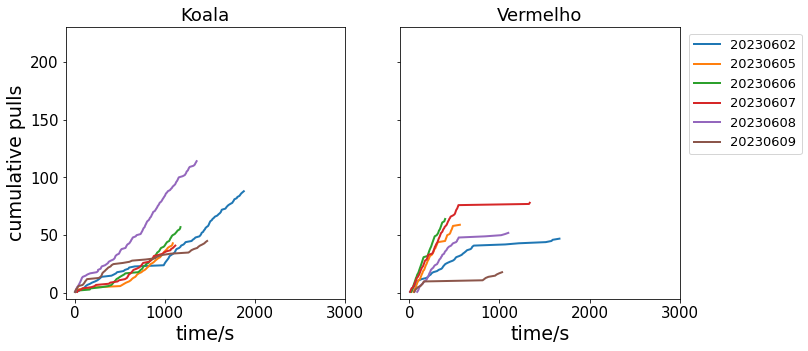

In [54]:
# plot for self condition
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
#
for ii in np.arange(0,nsessions,1):
    xxx = cumulative_pulls_animal1[session_dates[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal1[session_dates[ii]])[0]+1,1)
    axs[0].plot(xxx,yyy,linewidth=2)
    xxx = cumulative_pulls_animal2[session_dates[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal2[session_dates[ii]])[0]+1,1)
    axs[1].plot(xxx,yyy,linewidth=2)
axs[0].set_title(animal1_name+"",fontsize = 18)
axs[0].set_ylim([-5,230])
axs[0].set_xlim([-100,3000])
axs[0].set_xlabel("time/s",fontsize = 19)
axs[0].set_ylabel("cumulative pulls",fontsize = 19)
axs[0].tick_params(labelsize = 15)
axs[1].set_title(animal2_name+"",fontsize = 18)    
axs[1].set_ylim([-5,230])
axs[1].set_xlim([-100,3000])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=session_dates, fontsize = 13,bbox_to_anchor=(1.01, 1), loc='upper left')
#plt.savefig("cumulative_pulling.png")

### inter-pull interval

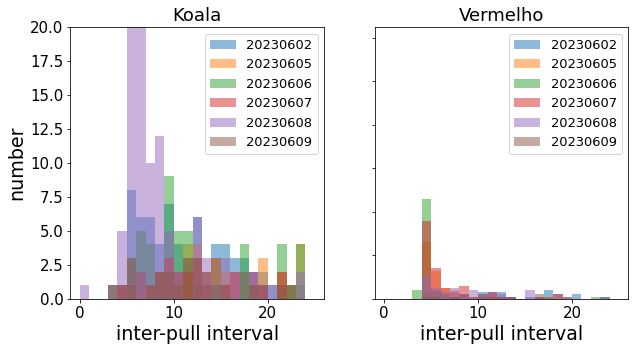

In [63]:
# animal1 inter-pull interval
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
#
mean_interpull_interval_animal1 = []
#
for ii in np.arange(0,nsessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal1[session_dates[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[0].hist(interpull_interval,alpha=0.5, bins=np.arange(0,25,1))
    #
    mean_interpull_interval_animal1.append(np.mean(interpull_interval))

#
mean_interpull_interval_animal2 = []
#
for ii in np.arange(0,nsessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal2[session_dates[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[1].hist(interpull_interval,alpha=0.5, bins=np.arange(0,25,1))
    #
    mean_interpull_interval_animal2.append(np.mean(interpull_interval))
#

axs[0].set_title(animal1_name,fontsize = 18)
axs[0].set_xlabel("inter-pull interval",fontsize = 19)
axs[0].set_ylabel("number",fontsize = 19)
axs[0].set_xlim([-1,26])
axs[0].set_ylim([0,20])
axs[0].tick_params(labelsize = 15)
axs[0].legend(labels=session_dates, fontsize = 13)
axs[1].set_title(animal2_name,fontsize = 18)
axs[1].set_xlabel("inter-pull interval",fontsize = 19)
axs[1].set_ylabel("")
axs[1].set_xlim([-1,26])
axs[1].set_ylim([0,125])
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=session_dates, fontsize = 13)